<h1>PW3-Supervised Machine Learning :A basic supervised Learning algorithms  </h1>

<h2>Exercise 1 : Scale the data</h2>
You will need the dataset Wine quality, with Quality column has two classes good and bad.  We have to classif your wine in these two classes based on the features:

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [188]:
wine_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [189]:
wine_data.isnull().sum()
#Thank god, there is no missing values. We don't have to clean the dataset. But we still need to format it.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [190]:
X = wine_data.drop('quality', axis=1)
Y = wine_data['quality']

Train test split

In [191]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3428, 11)
x_test shape:  (1470, 11)
y_train shape:  (3428,)
y_test shape:  (1470,)


Normalization and standardization

In [192]:
standartScaler = StandardScaler()
x_train = standartScaler.fit_transform(x_train)
x_test = standartScaler.transform(x_test)

Linear regression

In [193]:
linereg = LinearRegression()
linereg.fit(x_train, y_train)
y_pred = linereg.predict(x_test)

In [194]:
print("R2 score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R2 score:  0.26788524013845827
MSE:  0.6028229341410909


<h2>Exercise 2 : Prediction pipeline and evaluation</h2>

In [195]:
def LR_Pipeline(scaler):
    my_pipeline = Pipeline(steps=[('scaler', scaler), ('linereg', LinearRegression())])
    return my_pipeline 

In [196]:
def applyPipeline(X, Y, test_size, scaler):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=20)
    pipeline = LR_Pipeline(scaler)
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    print("Scaler: ", pipeline.steps[0][1], "Test size: ", test_size)
    print("R2 score: ", r2_score(y_test, y_pred))
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("predictor coef : ", pipeline.steps[1][1].coef_)
    print("predictor intercept : ", pipeline.steps[1][1].intercept_)
    return y_pred , y_test

In [197]:
y_pred_st1, y_test_st1 =applyPipeline( X, Y, 0.1, standartScaler)

Scaler:  StandardScaler() Test size:  0.1
R2 score:  0.2528098427486969
MSE:  0.641556576669303
predictor coef :  [ 0.05195561 -0.18982215  0.00212291  0.38670789 -0.00676798  0.07438111
 -0.01855267 -0.41023587  0.0965043   0.06587784  0.25865955]
predictor intercept :  5.885208711433732


In [198]:
y_pred_min1, y_test_min1=applyPipeline( X, Y, 0.1, MinMaxScaler())

Scaler:  MinMaxScaler() Test size:  0.1
R2 score:  0.252809842748696
MSE:  0.6415565766693038
predictor coef :  [ 0.64101397 -1.92519845  0.02916597  4.96773326 -0.09485583  0.6497778
 -0.1577091  -7.07514648  0.70287741  0.46196863  1.29464779]
predictor intercept :  5.501311272896241


In [199]:
y_pred_st2 , y_test_st2= applyPipeline(X, Y, 0.2, standartScaler)

Scaler:  StandardScaler() Test size:  0.2
R2 score:  0.25865427519753426
MSE:  0.6207195741681919
predictor coef :  [ 0.03824967 -0.1809646   0.00107308  0.39074753 -0.00838017  0.07908096
 -0.02739194 -0.3981574   0.09339981  0.06027215  0.26270551]
predictor intercept :  5.889994895354774


In [200]:
y_pred_min2 , y_test_min2= applyPipeline(X, Y, 0.2, MinMaxScaler())

Scaler:  MinMaxScaler() Test size:  0.2
R2 score:  0.2586542751975337
MSE:  0.6207195741681923
predictor coef :  [ 0.47159918 -1.67079633  0.01476488  5.01366986 -0.11682852  0.68986313
 -0.23223681 -6.84121953  0.6775634   0.42081706  1.30735825]
predictor intercept :  5.547327208949287


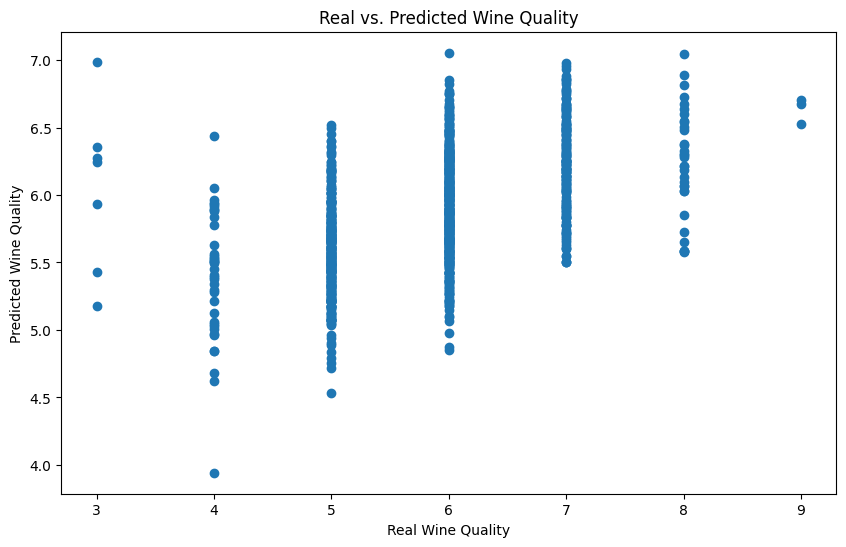

In [201]:
# Visualize the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_st2, y_pred_st2)
plt.xlabel("Real Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Real vs. Predicted Wine Quality")
plt.show()

<h2>Exercise 3 : Logistic regression</h2>

In [202]:
Ybin = wine_data['quality'].apply(lambda x: 1 if x >= 5 else 0)

In [203]:
x_train, x_test, y_train, y_test = train_test_split(X, Ybin, test_size=0.3, random_state=20)

In [204]:
def Reg_Pipeline(scaler, model):
    my_pipeline = Pipeline(steps=[('scaler', scaler), ('model', model)])
    return my_pipeline

In [205]:
logreg = LogisticRegression()

In [206]:
pipelineloStandard = Reg_Pipeline(standartScaler, logreg)

In [207]:
pipelineloStandard.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [208]:
pred = pipelineloStandard.predict(x_test)

In [209]:
accuracy = accuracy_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)
classification_rep = classification_report(y_test,pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9591836734693877
Confusion Matrix:
 [[   2   59]
 [   1 1408]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.03      0.06        61
           1       0.96      1.00      0.98      1409

    accuracy                           0.96      1470
   macro avg       0.81      0.52      0.52      1470
weighted avg       0.95      0.96      0.94      1470


In [210]:
print("quantity of 0 samples: ", len(y_test[y_test == 0]))
print("quantity of 1 samples: ", len(y_test[y_test == 1]))
#huge imbalance between the two classes

quantity of 0 samples:  61
quantity of 1 samples:  1409


<h2>Exercise 4 : Naive Bayes classification</h2>

In [211]:
x_train, x_test, y_train, y_test = train_test_split(X, Ybin, test_size=0.2, random_state=20)

In [212]:
gnb = GaussianNB()

In [213]:
pipelineNB = Reg_Pipeline(standartScaler, gnb)

In [214]:
pipelineNB.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())])

In [215]:
pred = pipelineNB.predict(x_test)

In [216]:
accuracy = accuracy_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)
classification_rep = classification_report(y_test,pred)

In [217]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9336734693877551
Confusion Matrix:
 [[ 15  32]
 [ 33 900]]
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.32      0.32        47
           1       0.97      0.96      0.97       933

    accuracy                           0.93       980
   macro avg       0.64      0.64      0.64       980
weighted avg       0.93      0.93      0.93       980


<h2>Exercise 5 : performance comparison between different models</h2>

in order to compare the performance of the two models, we will use the roc_auc_score metric, which is a metric that is not affected by the imbalance of the classes.

In [218]:
scoreLogistic = roc_auc_score(y_test, pipelineloStandard.predict_proba(x_test)[:,1])
scoreNB = roc_auc_score(y_test, pipelineNB.predict_proba(x_test)[:,1])

In [219]:
print("Logistic Regression score: ", scoreLogistic)
print("Naive Bayes score: ", scoreNB)

Logistic Regression score:  0.6966317757861851
Naive Bayes score:  0.7687852044423159


the score of Naive Bayes is better than the score of Logistic Regression, thus Naive Bayes is better than Logistic Regression for our dataset.

<h2>Exercise 6 :  Do it from scratch</h2>
<p>
Now you have a new dataset describing the Breast cancer. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present inthe image.<br>  

The Attribute Information are:<br>
1.  ID number<br>
2.  Diagnosis (M = malignant, B = benign)<br>
Ten real-valued features are computed for each cell nucleus:<br>
1.  radius (mean of distances from center to points on the perimeter)<br>
2.  texture (standard deviation of gray-scale values)<br>
3.  perimeter<br>
4.  area<br>
5.  smoothness (local variation in radius lengths)<br>
6.  compactness(perimeter2/area−1.0)<br>
7.  concavity (severity of concave portions of the contour)<br>
8.  concave points (number of concave portions of the contour)<br>
9.  symmetry<br>
10.  fractal dimension (”coastline approximation” - 1)<br>
The mean,  standard error and ”worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE,field 23 is Worst Radius.<br>
All feature values are recorded with four significant digits.<br>
Missing attribute values: none. But you have to check. <br>
Class distribution: 357 benign, 212 malignant<br>
To do:Make a comparative study between Logistic regression and Naive Bayes
</p>


Data Loading and Exploration:

In [220]:
cancer_data = pd.read_csv('Pw Datasets/BreastCancer.csv', sep=',')

In [221]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [222]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [223]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [224]:
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Data cleaning

In [225]:
cancer_data = cancer_data.drop(columns=['Unnamed: 32'])

In [226]:
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

Splitting the data

In [227]:
Xcanc = cancer_data.drop(columns=['id', 'diagnosis'])
ycanc = cancer_data['diagnosis']
X_train_canc, X_test_canc, y_train_canc, y_test_canc = train_test_split(Xcanc, ycanc, test_size=0.2, random_state=42)

Logistic Regression

In [228]:
logistic = LogisticRegression()
pipelineLogistic = Reg_Pipeline(standartScaler, logistic)

In [229]:
pipelineLogistic.fit(X_train_canc, y_train_canc)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [230]:
LogisticPrediction = pipelineLogistic.predict(X_test_canc)

In [231]:
accuracy = accuracy_score(y_test_canc, LogisticPrediction)
confusion = confusion_matrix(y_test_canc, LogisticPrediction)
classification_rep = classification_report(y_test_canc,LogisticPrediction)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9736842105263158
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Naive Bayes

In [232]:
NaiBayes = GaussianNB()
pipelineNaivesB = Reg_Pipeline(standartScaler, NaiBayes)

In [233]:
pipelineNaivesB.fit(X_train_canc, y_train_canc)

Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())])

In [234]:
NaiveBayesPrediction = pipelineNaivesB.predict(X_test_canc)

In [235]:
accuracy = accuracy_score(y_test_canc, NaiveBayesPrediction)
confusion = confusion_matrix(y_test_canc, NaiveBayesPrediction)
classification_rep = classification_report(y_test_canc,NaiveBayesPrediction)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Comparative study

The Naive Bayes model has slightly higher accuracy, recall, and F1-score compared to the Logistic Regression model.
Both models performed exceptionally well, but Naive Bayes has a slight edge in this dataset.